# NLP Tweet Modeling

In [ ]:
#import packages
import folium
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,HashingVectorizer
from nltk.probability import FreqDist
from nltk.tokenize import regexp_tokenize,word_tokenize,RegexpTokenizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from functions import *
from sklearn.linear_model import LogisticRegressionCV

In [2]:
df = pd.read_csv('./data/Tweets.csv')

In [64]:
#define function to do the cleanup
def cleanup(tweet):
    stop_words = stopwords.words('english')
    AirlineStopwords = ['United', 'Virgin America', 'Delta', 'US Airways', 'Southwest', 'American', 'amp', 'plane', 'flight', 'JetBlue']
    stop_words.extend(AirlineStopwords)
    lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'[@a-zA-Z0-9]+')
    
    tweet = tweet.lower()
    tweet = tokenizer.tokenize(tweet)
    tweet = [w for w in tweet if w not in stop_words]
    tweet = [lemmatizer.lemmatize(w) for w in tweet]
    tweet = ' '.join(tweet)
    
    return tweet

In [65]:
stop_words = stopwords.words('english')
AirlineStopwords = ['United', 'Virgin America', 'Delta', 'US Airways', 'Southwest', 'American', 'amp', 'plane', 'flight', 'JetBlue']
stop_words.extend(AirlineStopwords)

vectorizer = TfidfVectorizer(stop_words=stop_words, token_pattern='[a-zA-Z0-9]+')

x = df['text'].apply(cleanup)
y = df['airline_sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=16)


In [66]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [6]:
x_train

<10980x11833 sparse matrix of type '<class 'numpy.float64'>'
	with 111896 stored elements in Compressed Sparse Row format>

In [78]:
models = vanilla_models(x_train, x_test, y_train, y_test)

[02:35:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [7]:
solvers = ['newton-cg', 'sag', 'saga' , 'liblinear']

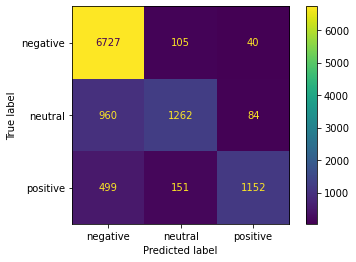

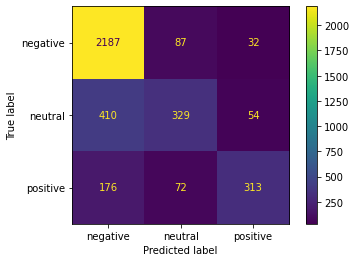

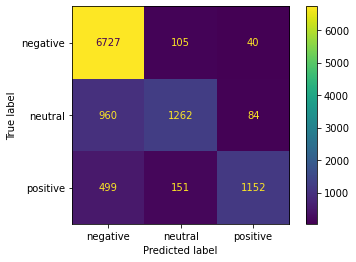

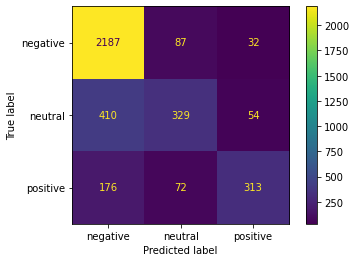

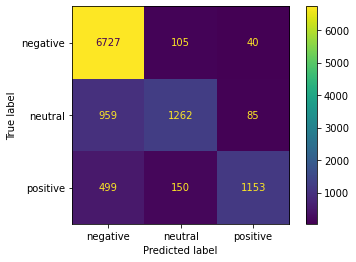

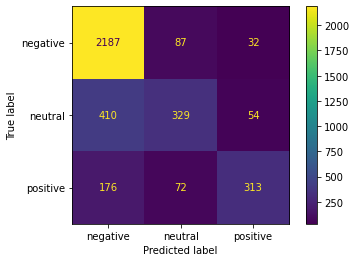

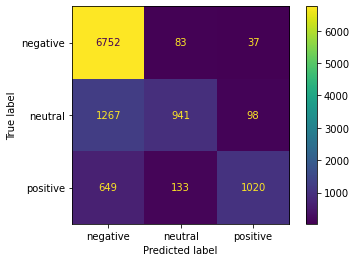

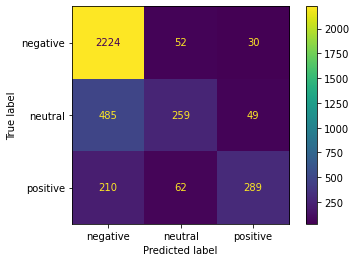

In [71]:
regressions = []
for solver in solvers:
    logreg=LogisticRegression(solver=solver,C=.5)
    regressions.append(run_model(logreg,x_train, x_test, y_train, y_test))

In [72]:
len(regressions)

4

In [73]:
regressions[0]

({'classifier': LogisticRegression(C=0.5, solver='newton-cg'),
  'train accuracy': 0.833,
  'train precision': 0.837,
  'train recall': 0.833,
  'train f1 score': 0.821,
  'test accuracy': 0.773,
  'test precision': 0.763,
  'test recall': 0.773,
  'test f1 score': 0.754,
  'test time': 0.58},
 'Top plot: Training Data',
 'Bottom Plot: Testing Data')

In [74]:
regressions[1]

({'classifier': LogisticRegression(C=0.5, solver='sag'),
  'train accuracy': 0.833,
  'train precision': 0.837,
  'train recall': 0.833,
  'train f1 score': 0.821,
  'test accuracy': 0.773,
  'test precision': 0.763,
  'test recall': 0.773,
  'test f1 score': 0.754,
  'test time': 0.33},
 'Top plot: Training Data',
 'Bottom Plot: Testing Data')

In [75]:
regressions[2]

({'classifier': LogisticRegression(C=0.5, solver='saga'),
  'train accuracy': 0.833,
  'train precision': 0.837,
  'train recall': 0.833,
  'train f1 score': 0.821,
  'test accuracy': 0.773,
  'test precision': 0.763,
  'test recall': 0.773,
  'test f1 score': 0.754,
  'test time': 0.37},
 'Top plot: Training Data',
 'Bottom Plot: Testing Data')